In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
archivos = [1,3,5,7,10]
filename = 'watershed_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_{}.0_nside_360.hdf5'

grupos = []

aleatorio = np.random.randint(0,360)
for i in archivos:
    with h5py.File(filename.format(i), 'r') as f:
        print(f.keys())
        watershed_groups_key = list(f.keys())[0]
        watershed_groups = np.array(f[watershed_groups_key])
        
    grupos.append(watershed_groups)
    

<KeysViewHDF5 ['watershed_group']>
<KeysViewHDF5 ['watershed_group']>
<KeysViewHDF5 ['watershed_group']>
<KeysViewHDF5 ['watershed_group']>
<KeysViewHDF5 ['watershed_group']>


In [3]:
filename = 'velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_{}.0_nside_360.hdf5'
divergencias = []
datos_seleccionados = []
datos_seleccionados2 = []

aleatorio = np.random.randint(0,360)
for i in archivos:
    with h5py.File(filename.format(i), 'r') as f:
        print(f.keys())
        divergence = list(f.keys())[0]
        dataDivergence = np.array(f[divergence])
        
    divergencias.append(dataDivergence)
    #datos_seleccionados.append(np.array(dataDivergence[aleatorio])[:120,:120])
    

<KeysViewHDF5 ['divergence', 'vel_x', 'vel_y', 'vel_z']>
<KeysViewHDF5 ['divergence', 'vel_x', 'vel_y', 'vel_z']>
<KeysViewHDF5 ['divergence', 'vel_x', 'vel_y', 'vel_z']>
<KeysViewHDF5 ['divergence', 'vel_x', 'vel_y', 'vel_z']>
<KeysViewHDF5 ['divergence', 'vel_x', 'vel_y', 'vel_z']>


In [4]:
group_num = []
for i in grupos:
    group_num.append(len(list(set(i.flatten()))))

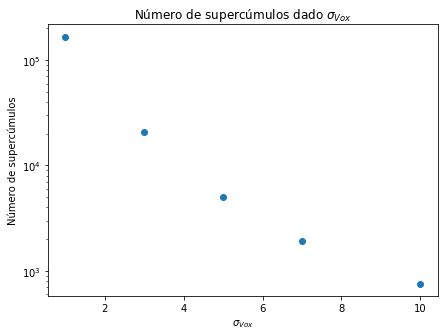

In [5]:
plt.figure(figsize = (7,5))
plt.semilogy(archivos,group_num,'o')
plt.title("Número de supercúmulos dado $\sigma_{Vox}$")
plt.xlabel("$\sigma_{Vox}$")
plt.ylabel("Número de supercúmulos")
plt.savefig('NumSupercumulos.png')

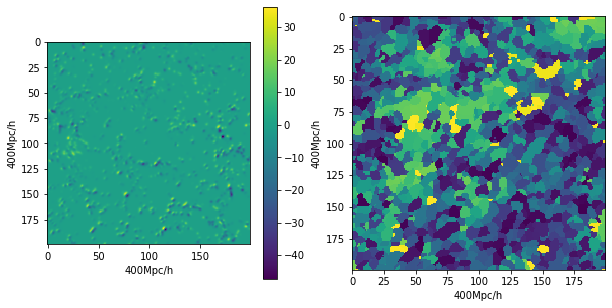

In [6]:
#aleatorio = np.random.randint(0,360)
sigma_vox = 0
ws = grupos[sigma_vox][aleatorio][:200,:200]
divergence = divergencias[sigma_vox][aleatorio][:200,:200]
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.imshow(divergence)
plt.xlabel('400Mpc/h')
plt.ylabel('400Mpc/h')

plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(ws)
plt.xlabel('400Mpc/h')
plt.ylabel('400Mpc/h')
plt.savefig('smooth_watershed_01.png')

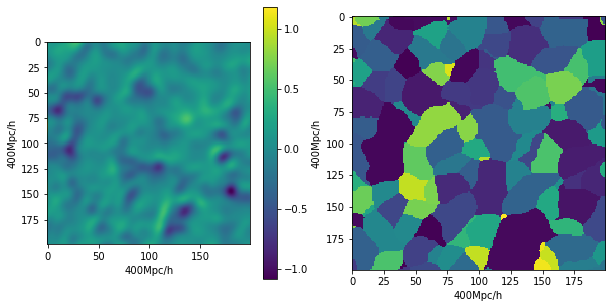

In [7]:
#aleatorio = np.random.randint(0,360)
sigma_vox = 2
ws = grupos[sigma_vox][aleatorio][:200,:200]
divergence = divergencias[sigma_vox][aleatorio][:200,:200]
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.imshow(divergence)
plt.xlabel('400Mpc/h')
plt.ylabel('400Mpc/h')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(ws)
plt.xlabel('400Mpc/h')
plt.ylabel('400Mpc/h')
plt.savefig('smooth_watershed_05.png')

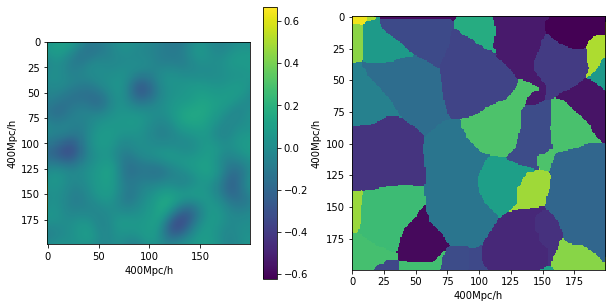

In [8]:
sigma_vox = 4
ws = grupos[sigma_vox][aleatorio][:200,:200]
divergence = divergencias[sigma_vox][aleatorio][:200,:200]
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.imshow(divergence)
plt.xlabel('400Mpc/h')
plt.ylabel('400Mpc/h')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(ws)
plt.xlabel('400Mpc/h')
plt.ylabel('400Mpc/h')
plt.savefig('smooth_watershed_10.png')

In [9]:
volumen = 8
ws = grupos[2]
orden = len(list(set(ws.flatten())))

In [10]:
volumenes = []
for i in range(orden):
    if(i%100==0):
        print(i)
    volumenes.append(len(ws[ws==i])*volumen)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


Text(0.5, 0, '$Log_{10}Volume[Mpc^3h^{-3}]$')

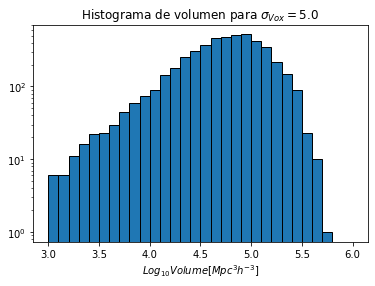

In [11]:
plt.hist(np.log10(volumenes),log=True,bins=30,edgecolor = 'black', range = (3,6))
plt.title('Histograma de volumen para $\sigma_{Vox} = 5.0$')
plt.xlabel('$Log_{10}Volume[Mpc^3h^{-3}]$')

In [12]:
import AbacusCosmos.Halos as ach
from astropy.table import Table
from collections import Counter
import scipy.ndimage as scpimg

In [13]:
path = "C:/AbacusCosmos/"
halo_data = ach.read_halos_FoF(path)
N = halo_data['N']
posiciones = halo_data['pos']
pos_x = posiciones[:,0]
pos_y = posiciones[:,1]
pos_z = posiciones[:,2]

In [14]:
masa_particula = 1.E10

In [15]:
np.array(np.where(ws == 500))

array([[ 3,  3,  3, ..., 48, 48, 48],
       [60, 60, 60, ..., 80, 80, 81],
       [13, 14, 15, ...,  9, 10, 10]], dtype=int64)

In [16]:
masas_original = np.zeros((360,360,360))
pos_x_mod = (pos_x*0.4999+180)//1
pos_y_mod = (pos_y*0.4999+180)//1
pos_z_mod = (pos_z*0.4999+180)//1

In [17]:
pos_mod = np.array([pos_x_mod,pos_y_mod,pos_z_mod]).T

In [18]:
pos_mod

array([[  6., 355., 124.],
       [  0., 358., 184.],
       [  1., 352.,  45.],
       ...,
       [353., 204., 357.],
       [351., 210., 358.],
       [358., 208., 352.]], dtype=float32)

In [19]:
for i in range(len(pos_mod)):
    if(i%100==0):
        print(i)
    masas_original[int(pos_mod[i][0]),int(pos_mod[i][1]),int(pos_mod[i][2])] += N[i]

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

207300
207400
207500
207600
207700
207800
207900
208000
208100
208200
208300
208400
208500
208600
208700
208800
208900
209000
209100
209200
209300
209400
209500
209600
209700
209800
209900
210000
210100
210200
210300
210400
210500
210600
210700
210800
210900
211000
211100
211200
211300
211400
211500
211600
211700
211800
211900
212000
212100
212200
212300
212400
212500
212600
212700
212800
212900
213000
213100
213200
213300
213400
213500
213600
213700
213800
213900
214000
214100
214200
214300
214400
214500
214600
214700
214800
214900
215000
215100
215200
215300
215400
215500
215600
215700
215800
215900
216000
216100
216200
216300
216400
216500
216600
216700
216800
216900
217000
217100
217200
217300
217400
217500
217600
217700
217800
217900
218000
218100
218200
218300
218400
218500
218600
218700
218800
218900
219000
219100
219200
219300
219400
219500
219600
219700
219800
219900
220000
220100
220200
220300
220400
220500
220600
220700
220800
220900
221000
221100
221200
221300
221400
221500

340900
341000
341100
341200
341300
341400
341500
341600
341700
341800
341900
342000
342100
342200
342300
342400
342500
342600
342700
342800
342900
343000
343100
343200
343300
343400
343500
343600
343700
343800
343900
344000
344100
344200
344300
344400
344500
344600
344700
344800
344900
345000
345100
345200
345300
345400
345500
345600
345700
345800
345900
346000
346100
346200
346300
346400
346500
346600
346700
346800
346900
347000
347100
347200
347300
347400
347500
347600
347700
347800
347900
348000
348100
348200
348300
348400
348500
348600
348700
348800
348900
349000
349100
349200
349300
349400
349500
349600
349700
349800
349900
350000
350100
350200
350300
350400
350500
350600
350700
350800
350900
351000
351100
351200
351300
351400
351500
351600
351700
351800
351900
352000
352100
352200
352300
352400
352500
352600
352700
352800
352900
353000
353100
353200
353300
353400
353500
353600
353700
353800
353900
354000
354100
354200
354300
354400
354500
354600
354700
354800
354900
355000
355100

473800
473900
474000
474100
474200
474300
474400
474500
474600
474700
474800
474900
475000
475100
475200
475300
475400
475500
475600
475700
475800
475900
476000
476100
476200
476300
476400
476500
476600
476700
476800
476900
477000
477100
477200
477300
477400
477500
477600
477700
477800
477900
478000
478100
478200
478300
478400
478500
478600
478700
478800
478900
479000
479100
479200
479300
479400
479500
479600
479700
479800
479900
480000
480100
480200
480300
480400
480500
480600
480700
480800
480900
481000
481100
481200
481300
481400
481500
481600
481700
481800
481900
482000
482100
482200
482300
482400
482500
482600
482700
482800
482900
483000
483100
483200
483300
483400
483500
483600
483700
483800
483900
484000
484100
484200
484300
484400
484500
484600
484700
484800
484900
485000
485100
485200
485300
485400
485500
485600
485700
485800
485900
486000
486100
486200
486300
486400
486500
486600
486700
486800
486900
487000
487100
487200
487300
487400
487500
487600
487700
487800
487900
488000

623700
623800
623900
624000
624100
624200
624300
624400
624500
624600
624700
624800
624900
625000
625100
625200
625300
625400
625500
625600
625700
625800
625900
626000
626100
626200
626300
626400
626500
626600
626700
626800
626900
627000
627100
627200
627300
627400
627500
627600
627700
627800
627900
628000
628100
628200
628300
628400
628500
628600
628700
628800
628900
629000
629100
629200
629300
629400
629500
629600
629700
629800
629900
630000
630100
630200
630300
630400
630500
630600
630700
630800
630900
631000
631100
631200
631300
631400
631500
631600
631700
631800
631900
632000
632100
632200
632300
632400
632500
632600
632700
632800
632900
633000
633100
633200
633300
633400
633500
633600
633700
633800
633900
634000
634100
634200
634300
634400
634500
634600
634700
634800
634900
635000
635100
635200
635300
635400
635500
635600
635700
635800
635900
636000
636100
636200
636300
636400
636500
636600
636700
636800
636900
637000
637100
637200
637300
637400
637500
637600
637700
637800
637900

795900
796000
796100
796200
796300
796400
796500
796600
796700
796800
796900
797000
797100
797200
797300
797400
797500
797600
797700
797800
797900
798000
798100
798200
798300
798400
798500
798600
798700
798800
798900
799000
799100
799200
799300
799400
799500
799600
799700
799800
799900
800000
800100
800200
800300
800400
800500
800600
800700
800800
800900
801000
801100
801200
801300
801400
801500
801600
801700
801800
801900
802000
802100
802200
802300
802400
802500
802600
802700
802800
802900
803000
803100
803200
803300
803400
803500
803600
803700
803800
803900
804000
804100
804200
804300
804400
804500
804600
804700
804800
804900
805000
805100
805200
805300
805400
805500
805600
805700
805800
805900
806000
806100
806200
806300
806400
806500
806600
806700
806800
806900
807000
807100
807200
807300
807400
807500
807600
807700
807800
807900
808000
808100
808200
808300
808400
808500
808600
808700
808800
808900
809000
809100
809200
809300
809400
809500
809600
809700
809800
809900
810000
810100

973500
973600
973700
973800
973900
974000
974100
974200
974300
974400
974500
974600
974700
974800
974900
975000
975100
975200
975300
975400
975500
975600
975700
975800
975900
976000
976100
976200
976300
976400
976500
976600
976700
976800
976900
977000
977100
977200
977300
977400
977500
977600
977700
977800
977900
978000
978100
978200
978300
978400
978500
978600
978700
978800
978900
979000
979100
979200
979300
979400
979500
979600
979700
979800
979900
980000
980100
980200
980300
980400
980500
980600
980700
980800
980900
981000
981100
981200
981300
981400
981500
981600
981700
981800
981900
982000
982100
982200
982300
982400
982500
982600
982700
982800
982900
983000
983100
983200
983300
983400
983500
983600
983700
983800
983900
984000
984100
984200
984300
984400
984500
984600
984700
984800
984900
985000
985100
985200
985300
985400
985500
985600
985700
985800
985900
986000
986100
986200
986300
986400
986500
986600
986700
986800
986900
987000
987100
987200
987300
987400
987500
987600
987700

1161400
1161500
1161600
1161700
1161800
1161900
1162000
1162100
1162200
1162300
1162400
1162500
1162600
1162700
1162800
1162900
1163000
1163100
1163200
1163300
1163400
1163500
1163600
1163700
1163800
1163900
1164000
1164100
1164200
1164300
1164400
1164500
1164600
1164700
1164800
1164900
1165000
1165100
1165200
1165300
1165400
1165500
1165600
1165700
1165800
1165900
1166000
1166100
1166200
1166300
1166400
1166500
1166600
1166700
1166800
1166900
1167000
1167100
1167200
1167300
1167400
1167500
1167600
1167700
1167800
1167900
1168000
1168100
1168200
1168300
1168400
1168500
1168600
1168700
1168800
1168900
1169000
1169100
1169200
1169300
1169400
1169500
1169600
1169700
1169800
1169900
1170000
1170100
1170200
1170300
1170400
1170500
1170600
1170700
1170800
1170900
1171000
1171100
1171200
1171300
1171400
1171500
1171600
1171700
1171800
1171900
1172000
1172100
1172200
1172300
1172400
1172500
1172600
1172700
1172800
1172900
1173000
1173100
1173200
1173300
1173400
1173500
1173600
1173700
1173800


1312700
1312800
1312900
1313000
1313100
1313200
1313300
1313400
1313500
1313600
1313700
1313800
1313900
1314000
1314100
1314200
1314300
1314400
1314500
1314600
1314700
1314800
1314900
1315000
1315100
1315200
1315300
1315400
1315500
1315600
1315700
1315800
1315900
1316000
1316100
1316200
1316300
1316400
1316500
1316600
1316700
1316800
1316900
1317000
1317100
1317200
1317300
1317400
1317500
1317600
1317700
1317800
1317900
1318000
1318100
1318200
1318300
1318400
1318500
1318600
1318700
1318800
1318900
1319000
1319100
1319200
1319300
1319400
1319500
1319600
1319700
1319800
1319900
1320000
1320100
1320200
1320300
1320400
1320500
1320600
1320700
1320800
1320900
1321000
1321100
1321200
1321300
1321400
1321500
1321600
1321700
1321800
1321900
1322000
1322100
1322200
1322300
1322400
1322500
1322600
1322700
1322800
1322900
1323000
1323100
1323200
1323300
1323400
1323500
1323600
1323700
1323800
1323900
1324000
1324100
1324200
1324300
1324400
1324500
1324600
1324700
1324800
1324900
1325000
1325100


1462300
1462400
1462500
1462600
1462700
1462800
1462900
1463000
1463100
1463200
1463300
1463400
1463500
1463600
1463700
1463800
1463900
1464000
1464100
1464200
1464300
1464400
1464500
1464600
1464700
1464800
1464900
1465000
1465100
1465200
1465300
1465400
1465500
1465600
1465700
1465800
1465900
1466000
1466100
1466200
1466300
1466400
1466500
1466600
1466700
1466800
1466900
1467000
1467100
1467200
1467300
1467400
1467500
1467600
1467700
1467800
1467900
1468000
1468100
1468200
1468300
1468400
1468500
1468600
1468700
1468800
1468900
1469000
1469100
1469200
1469300
1469400
1469500
1469600
1469700
1469800
1469900
1470000
1470100
1470200
1470300
1470400
1470500
1470600
1470700
1470800
1470900
1471000
1471100
1471200
1471300
1471400
1471500
1471600
1471700
1471800
1471900
1472000
1472100
1472200
1472300
1472400
1472500
1472600
1472700
1472800
1472900
1473000
1473100
1473200
1473300
1473400
1473500
1473600
1473700
1473800
1473900
1474000
1474100
1474200
1474300
1474400
1474500
1474600
1474700


1623100
1623200
1623300
1623400
1623500
1623600
1623700
1623800
1623900
1624000
1624100
1624200
1624300
1624400
1624500
1624600
1624700
1624800
1624900
1625000
1625100
1625200
1625300
1625400
1625500
1625600
1625700
1625800
1625900
1626000
1626100
1626200
1626300
1626400
1626500
1626600
1626700
1626800
1626900
1627000
1627100
1627200
1627300
1627400
1627500
1627600
1627700
1627800
1627900
1628000
1628100
1628200
1628300
1628400
1628500
1628600
1628700
1628800
1628900
1629000
1629100
1629200
1629300
1629400
1629500
1629600
1629700
1629800
1629900
1630000
1630100
1630200
1630300
1630400
1630500
1630600
1630700
1630800
1630900
1631000
1631100
1631200
1631300
1631400
1631500
1631600
1631700
1631800
1631900
1632000
1632100
1632200
1632300
1632400
1632500
1632600
1632700
1632800
1632900
1633000
1633100
1633200
1633300
1633400
1633500
1633600
1633700
1633800
1633900
1634000
1634100
1634200
1634300
1634400
1634500
1634600
1634700
1634800
1634900
1635000
1635100
1635200
1635300
1635400
1635500


1807500
1807600
1807700
1807800
1807900
1808000
1808100
1808200
1808300
1808400
1808500
1808600
1808700
1808800
1808900
1809000
1809100
1809200
1809300
1809400
1809500
1809600
1809700
1809800
1809900
1810000
1810100
1810200
1810300
1810400
1810500
1810600
1810700
1810800
1810900
1811000
1811100
1811200
1811300
1811400
1811500
1811600
1811700
1811800
1811900
1812000
1812100
1812200
1812300
1812400
1812500
1812600
1812700
1812800
1812900
1813000
1813100
1813200
1813300
1813400
1813500
1813600
1813700
1813800
1813900
1814000
1814100
1814200
1814300
1814400
1814500
1814600
1814700
1814800
1814900
1815000
1815100
1815200
1815300
1815400
1815500
1815600
1815700
1815800
1815900
1816000
1816100
1816200
1816300
1816400
1816500
1816600
1816700
1816800
1816900
1817000
1817100
1817200
1817300
1817400
1817500
1817600
1817700
1817800
1817900
1818000
1818100
1818200
1818300
1818400
1818500
1818600
1818700
1818800
1818900
1819000
1819100
1819200
1819300
1819400
1819500
1819600
1819700
1819800
1819900


1967900
1968000
1968100
1968200
1968300
1968400
1968500
1968600
1968700
1968800
1968900
1969000
1969100
1969200
1969300
1969400
1969500
1969600
1969700
1969800
1969900
1970000
1970100
1970200
1970300
1970400
1970500
1970600
1970700
1970800
1970900
1971000
1971100
1971200
1971300
1971400
1971500
1971600
1971700
1971800
1971900
1972000
1972100
1972200
1972300
1972400
1972500
1972600
1972700
1972800
1972900
1973000
1973100
1973200
1973300
1973400
1973500
1973600
1973700
1973800
1973900
1974000
1974100
1974200
1974300
1974400
1974500
1974600
1974700
1974800
1974900
1975000
1975100
1975200
1975300
1975400
1975500
1975600
1975700
1975800
1975900
1976000
1976100
1976200
1976300
1976400
1976500
1976600
1976700
1976800
1976900
1977000
1977100
1977200
1977300
1977400
1977500
1977600
1977700
1977800
1977900
1978000
1978100
1978200
1978300
1978400
1978500
1978600
1978700
1978800
1978900
1979000
1979100
1979200
1979300
1979400
1979500
1979600
1979700
1979800
1979900
1980000
1980100
1980200
1980300


2122800
2122900
2123000
2123100
2123200
2123300
2123400
2123500
2123600
2123700
2123800
2123900
2124000
2124100
2124200
2124300
2124400
2124500
2124600
2124700
2124800
2124900
2125000
2125100
2125200
2125300
2125400
2125500
2125600
2125700
2125800
2125900
2126000
2126100
2126200
2126300
2126400
2126500
2126600
2126700
2126800
2126900
2127000
2127100
2127200
2127300
2127400
2127500
2127600
2127700
2127800
2127900
2128000
2128100
2128200
2128300
2128400
2128500
2128600
2128700
2128800
2128900
2129000
2129100
2129200
2129300
2129400
2129500
2129600
2129700
2129800
2129900
2130000
2130100
2130200
2130300
2130400
2130500
2130600
2130700
2130800
2130900
2131000
2131100
2131200
2131300
2131400
2131500
2131600
2131700
2131800
2131900
2132000
2132100
2132200
2132300
2132400
2132500
2132600
2132700
2132800
2132900
2133000
2133100
2133200
2133300
2133400
2133500
2133600
2133700
2133800
2133900
2134000
2134100
2134200
2134300
2134400
2134500
2134600
2134700
2134800
2134900
2135000
2135100
2135200


2322700
2322800
2322900
2323000
2323100
2323200
2323300
2323400
2323500
2323600
2323700
2323800
2323900
2324000
2324100
2324200
2324300
2324400
2324500
2324600
2324700
2324800
2324900
2325000
2325100
2325200
2325300
2325400
2325500
2325600
2325700
2325800
2325900
2326000
2326100
2326200
2326300
2326400
2326500
2326600
2326700
2326800
2326900
2327000
2327100
2327200
2327300
2327400
2327500
2327600
2327700
2327800
2327900
2328000
2328100
2328200
2328300
2328400
2328500
2328600
2328700
2328800
2328900
2329000
2329100
2329200
2329300
2329400
2329500
2329600
2329700
2329800
2329900
2330000
2330100
2330200
2330300
2330400
2330500
2330600
2330700
2330800
2330900
2331000
2331100
2331200
2331300
2331400
2331500
2331600
2331700
2331800
2331900
2332000
2332100
2332200
2332300
2332400
2332500
2332600
2332700
2332800
2332900
2333000
2333100
2333200
2333300
2333400
2333500
2333600
2333700
2333800
2333900
2334000
2334100
2334200
2334300
2334400
2334500
2334600
2334700
2334800
2334900
2335000
2335100


2461100
2461200
2461300
2461400
2461500
2461600
2461700
2461800
2461900
2462000
2462100
2462200
2462300
2462400
2462500
2462600
2462700
2462800
2462900
2463000
2463100
2463200
2463300
2463400
2463500
2463600
2463700
2463800
2463900
2464000
2464100
2464200
2464300
2464400
2464500
2464600
2464700
2464800
2464900
2465000
2465100
2465200
2465300
2465400
2465500
2465600
2465700
2465800
2465900
2466000
2466100
2466200
2466300
2466400
2466500
2466600
2466700
2466800
2466900
2467000
2467100
2467200
2467300
2467400
2467500
2467600
2467700
2467800
2467900
2468000
2468100
2468200
2468300
2468400
2468500
2468600
2468700
2468800
2468900
2469000
2469100
2469200
2469300
2469400
2469500
2469600
2469700
2469800
2469900
2470000
2470100
2470200
2470300
2470400
2470500
2470600
2470700
2470800
2470900
2471000
2471100
2471200
2471300
2471400
2471500
2471600
2471700
2471800
2471900
2472000
2472100
2472200
2472300
2472400
2472500
2472600
2472700
2472800
2472900
2473000
2473100
2473200
2473300
2473400
2473500


2619900
2620000
2620100
2620200
2620300
2620400
2620500
2620600
2620700
2620800
2620900
2621000
2621100
2621200
2621300
2621400
2621500
2621600
2621700
2621800
2621900
2622000
2622100
2622200
2622300
2622400
2622500
2622600
2622700
2622800
2622900
2623000
2623100
2623200
2623300
2623400
2623500
2623600
2623700
2623800
2623900
2624000
2624100
2624200
2624300
2624400
2624500
2624600
2624700
2624800
2624900
2625000
2625100
2625200
2625300
2625400
2625500
2625600
2625700
2625800
2625900
2626000
2626100
2626200
2626300
2626400
2626500
2626600
2626700
2626800
2626900
2627000
2627100
2627200
2627300
2627400
2627500
2627600
2627700
2627800
2627900
2628000
2628100
2628200
2628300
2628400
2628500
2628600
2628700
2628800
2628900
2629000
2629100
2629200
2629300
2629400
2629500
2629600
2629700
2629800
2629900
2630000
2630100
2630200
2630300
2630400
2630500
2630600
2630700
2630800
2630900
2631000
2631100
2631200
2631300
2631400
2631500
2631600
2631700
2631800
2631900
2632000
2632100
2632200
2632300


2756600
2756700
2756800
2756900
2757000
2757100
2757200
2757300
2757400
2757500
2757600
2757700
2757800
2757900
2758000
2758100
2758200
2758300
2758400
2758500
2758600
2758700
2758800
2758900
2759000
2759100
2759200
2759300
2759400
2759500
2759600
2759700
2759800
2759900
2760000
2760100
2760200
2760300
2760400
2760500
2760600
2760700
2760800
2760900
2761000
2761100
2761200
2761300
2761400
2761500
2761600
2761700
2761800
2761900
2762000
2762100
2762200
2762300
2762400
2762500
2762600
2762700
2762800
2762900
2763000
2763100
2763200
2763300
2763400
2763500
2763600
2763700
2763800
2763900
2764000
2764100
2764200
2764300
2764400
2764500
2764600
2764700
2764800
2764900
2765000
2765100
2765200
2765300
2765400
2765500
2765600
2765700
2765800
2765900
2766000
2766100
2766200
2766300
2766400
2766500
2766600
2766700
2766800
2766900
2767000
2767100
2767200
2767300
2767400
2767500
2767600
2767700
2767800
2767900
2768000
2768100
2768200
2768300
2768400
2768500
2768600
2768700
2768800
2768900
2769000


2922300
2922400
2922500
2922600
2922700
2922800
2922900
2923000
2923100
2923200
2923300
2923400
2923500
2923600
2923700
2923800
2923900
2924000
2924100
2924200
2924300
2924400
2924500
2924600
2924700
2924800
2924900
2925000
2925100
2925200
2925300
2925400
2925500
2925600
2925700
2925800
2925900
2926000
2926100
2926200
2926300
2926400
2926500
2926600
2926700
2926800
2926900
2927000
2927100
2927200
2927300
2927400
2927500
2927600
2927700
2927800
2927900
2928000
2928100
2928200
2928300
2928400
2928500
2928600
2928700
2928800
2928900
2929000
2929100
2929200
2929300
2929400
2929500
2929600
2929700
2929800
2929900
2930000
2930100
2930200
2930300
2930400
2930500
2930600
2930700
2930800
2930900
2931000
2931100
2931200
2931300
2931400
2931500
2931600
2931700
2931800
2931900
2932000
2932100
2932200
2932300
2932400
2932500
2932600
2932700
2932800
2932900
2933000
2933100
2933200
2933300
2933400
2933500
2933600
2933700
2933800
2933900
2934000
2934100
2934200
2934300
2934400
2934500
2934600
2934700


3074500
3074600
3074700
3074800
3074900
3075000
3075100
3075200
3075300
3075400
3075500
3075600
3075700
3075800
3075900
3076000
3076100
3076200
3076300
3076400
3076500
3076600
3076700
3076800
3076900
3077000
3077100
3077200
3077300
3077400
3077500
3077600
3077700
3077800
3077900
3078000
3078100
3078200
3078300
3078400
3078500
3078600
3078700
3078800
3078900
3079000
3079100
3079200
3079300
3079400
3079500
3079600
3079700
3079800
3079900
3080000
3080100
3080200
3080300
3080400
3080500
3080600
3080700
3080800
3080900
3081000
3081100
3081200
3081300
3081400
3081500
3081600
3081700
3081800
3081900
3082000
3082100
3082200
3082300
3082400
3082500
3082600
3082700
3082800
3082900
3083000
3083100
3083200
3083300
3083400
3083500
3083600
3083700
3083800
3083900
3084000
3084100
3084200
3084300
3084400
3084500
3084600
3084700
3084800
3084900
3085000
3085100
3085200
3085300
3085400
3085500
3085600
3085700
3085800
3085900
3086000
3086100
3086200
3086300
3086400
3086500
3086600
3086700
3086800
3086900


3245200
3245300
3245400
3245500
3245600
3245700
3245800
3245900
3246000
3246100
3246200
3246300
3246400
3246500
3246600
3246700
3246800
3246900
3247000
3247100
3247200
3247300
3247400
3247500
3247600
3247700
3247800
3247900
3248000
3248100
3248200
3248300
3248400
3248500
3248600
3248700
3248800
3248900
3249000
3249100
3249200
3249300
3249400
3249500
3249600
3249700
3249800
3249900
3250000
3250100
3250200
3250300
3250400
3250500
3250600
3250700
3250800
3250900
3251000
3251100
3251200
3251300
3251400
3251500
3251600
3251700
3251800
3251900
3252000
3252100
3252200
3252300
3252400
3252500
3252600
3252700
3252800
3252900
3253000
3253100
3253200
3253300
3253400
3253500
3253600
3253700
3253800
3253900
3254000
3254100
3254200
3254300
3254400
3254500
3254600
3254700
3254800
3254900
3255000
3255100
3255200
3255300
3255400
3255500
3255600
3255700
3255800
3255900
3256000
3256100
3256200
3256300
3256400
3256500
3256600
3256700
3256800
3256900
3257000
3257100
3257200
3257300
3257400
3257500
3257600


3419200
3419300
3419400
3419500
3419600
3419700
3419800
3419900
3420000
3420100
3420200
3420300
3420400
3420500
3420600
3420700
3420800
3420900
3421000
3421100
3421200
3421300
3421400
3421500
3421600
3421700
3421800
3421900
3422000
3422100
3422200
3422300
3422400
3422500
3422600
3422700
3422800
3422900
3423000
3423100
3423200
3423300
3423400
3423500
3423600
3423700
3423800
3423900
3424000
3424100
3424200
3424300
3424400
3424500
3424600
3424700
3424800
3424900
3425000
3425100
3425200
3425300
3425400
3425500
3425600
3425700
3425800
3425900
3426000
3426100
3426200
3426300
3426400
3426500
3426600
3426700
3426800
3426900
3427000
3427100
3427200
3427300
3427400
3427500
3427600
3427700
3427800
3427900
3428000
3428100
3428200
3428300
3428400
3428500
3428600
3428700
3428800
3428900
3429000
3429100
3429200
3429300
3429400
3429500
3429600
3429700
3429800
3429900
3430000
3430100
3430200
3430300
3430400
3430500
3430600
3430700
3430800
3430900
3431000
3431100
3431200
3431300
3431400
3431500
3431600


3532500
3532600
3532700
3532800
3532900
3533000
3533100
3533200
3533300
3533400
3533500
3533600
3533700
3533800
3533900
3534000
3534100
3534200
3534300
3534400
3534500
3534600
3534700
3534800
3534900
3535000
3535100
3535200
3535300
3535400
3535500
3535600
3535700
3535800
3535900
3536000
3536100
3536200
3536300
3536400
3536500
3536600
3536700
3536800
3536900
3537000
3537100
3537200
3537300
3537400
3537500
3537600
3537700
3537800
3537900
3538000
3538100
3538200
3538300
3538400
3538500
3538600
3538700
3538800
3538900
3539000
3539100
3539200
3539300
3539400
3539500
3539600
3539700
3539800
3539900
3540000
3540100
3540200
3540300
3540400
3540500
3540600
3540700
3540800
3540900
3541000
3541100
3541200
3541300
3541400
3541500
3541600
3541700
3541800
3541900
3542000
3542100
3542200
3542300
3542400
3542500
3542600
3542700
3542800
3542900
3543000
3543100
3543200
3543300
3543400
3543500
3543600
3543700
3543800
3543900
3544000
3544100
3544200
3544300
3544400
3544500
3544600
3544700
3544800
3544900


3672700
3672800
3672900
3673000
3673100
3673200
3673300
3673400
3673500
3673600
3673700
3673800
3673900
3674000
3674100
3674200
3674300
3674400
3674500
3674600
3674700
3674800
3674900
3675000
3675100
3675200
3675300
3675400
3675500
3675600
3675700
3675800
3675900
3676000
3676100
3676200
3676300
3676400
3676500
3676600
3676700
3676800
3676900
3677000
3677100
3677200
3677300
3677400
3677500
3677600
3677700
3677800
3677900
3678000
3678100
3678200
3678300
3678400
3678500
3678600
3678700
3678800
3678900
3679000
3679100
3679200
3679300
3679400
3679500
3679600
3679700
3679800
3679900
3680000
3680100
3680200
3680300
3680400
3680500
3680600
3680700
3680800
3680900
3681000
3681100
3681200
3681300
3681400
3681500
3681600
3681700
3681800
3681900
3682000
3682100
3682200
3682300
3682400
3682500
3682600
3682700
3682800
3682900
3683000
3683100
3683200
3683300
3683400
3683500
3683600
3683700
3683800
3683900
3684000
3684100
3684200
3684300
3684400
3684500
3684600
3684700
3684800
3684900
3685000
3685100


3793400
3793500
3793600
3793700
3793800
3793900
3794000
3794100
3794200
3794300
3794400
3794500
3794600
3794700
3794800
3794900
3795000
3795100
3795200
3795300
3795400
3795500
3795600
3795700
3795800
3795900
3796000
3796100
3796200
3796300
3796400
3796500
3796600
3796700
3796800
3796900
3797000
3797100
3797200
3797300
3797400
3797500
3797600
3797700
3797800
3797900
3798000
3798100
3798200
3798300
3798400
3798500
3798600
3798700
3798800
3798900
3799000
3799100
3799200
3799300
3799400
3799500
3799600
3799700
3799800
3799900
3800000
3800100
3800200
3800300
3800400
3800500
3800600
3800700
3800800
3800900
3801000
3801100
3801200
3801300
3801400
3801500
3801600
3801700
3801800
3801900
3802000
3802100
3802200
3802300
3802400
3802500
3802600
3802700
3802800
3802900
3803000
3803100
3803200
3803300
3803400
3803500
3803600
3803700
3803800
3803900
3804000
3804100
3804200
3804300
3804400
3804500
3804600
3804700
3804800
3804900
3805000
3805100
3805200
3805300
3805400
3805500
3805600
3805700
3805800


3928400
3928500
3928600
3928700
3928800
3928900
3929000
3929100
3929200
3929300
3929400
3929500
3929600
3929700
3929800
3929900
3930000
3930100
3930200
3930300
3930400
3930500
3930600
3930700
3930800
3930900
3931000
3931100
3931200
3931300
3931400
3931500
3931600
3931700
3931800
3931900
3932000
3932100
3932200
3932300
3932400
3932500
3932600
3932700
3932800
3932900
3933000
3933100
3933200
3933300
3933400
3933500
3933600
3933700
3933800
3933900
3934000
3934100
3934200
3934300
3934400
3934500
3934600
3934700
3934800
3934900
3935000
3935100
3935200
3935300
3935400
3935500
3935600
3935700
3935800
3935900
3936000
3936100
3936200
3936300
3936400
3936500
3936600
3936700
3936800
3936900
3937000
3937100
3937200
3937300
3937400
3937500
3937600
3937700
3937800
3937900
3938000
3938100
3938200
3938300
3938400
3938500
3938600
3938700
3938800
3938900
3939000
3939100
3939200
3939300
3939400
3939500
3939600
3939700
3939800
3939900
3940000
3940100
3940200
3940300
3940400
3940500
3940600
3940700
3940800


4090100
4090200
4090300
4090400
4090500
4090600
4090700
4090800
4090900
4091000
4091100
4091200
4091300
4091400
4091500
4091600
4091700
4091800
4091900
4092000
4092100
4092200
4092300
4092400
4092500
4092600
4092700
4092800
4092900
4093000
4093100
4093200
4093300
4093400
4093500
4093600
4093700
4093800
4093900
4094000
4094100
4094200
4094300
4094400
4094500
4094600
4094700
4094800
4094900
4095000
4095100
4095200
4095300
4095400
4095500
4095600
4095700
4095800
4095900
4096000
4096100
4096200
4096300
4096400
4096500
4096600
4096700
4096800
4096900
4097000
4097100
4097200
4097300
4097400
4097500
4097600
4097700
4097800
4097900
4098000
4098100
4098200
4098300
4098400
4098500
4098600
4098700
4098800
4098900
4099000
4099100
4099200
4099300
4099400
4099500
4099600
4099700
4099800
4099900
4100000
4100100
4100200
4100300
4100400
4100500
4100600
4100700
4100800
4100900
4101000
4101100
4101200
4101300
4101400
4101500
4101600
4101700
4101800
4101900
4102000
4102100
4102200
4102300
4102400
4102500


4242900
4243000
4243100
4243200
4243300
4243400
4243500
4243600
4243700
4243800
4243900
4244000
4244100
4244200
4244300
4244400
4244500
4244600
4244700
4244800
4244900
4245000
4245100
4245200
4245300
4245400
4245500
4245600
4245700
4245800
4245900
4246000
4246100
4246200
4246300
4246400
4246500
4246600
4246700
4246800
4246900
4247000
4247100
4247200
4247300
4247400
4247500
4247600
4247700
4247800
4247900
4248000
4248100
4248200
4248300
4248400
4248500
4248600
4248700
4248800
4248900
4249000
4249100
4249200
4249300
4249400
4249500
4249600
4249700
4249800
4249900
4250000
4250100
4250200
4250300
4250400
4250500
4250600
4250700
4250800
4250900
4251000
4251100
4251200
4251300
4251400
4251500
4251600
4251700
4251800
4251900
4252000
4252100
4252200
4252300
4252400
4252500
4252600
4252700
4252800
4252900
4253000
4253100
4253200
4253300
4253400
4253500
4253600
4253700
4253800
4253900
4254000
4254100
4254200
4254300
4254400
4254500
4254600
4254700
4254800
4254900
4255000
4255100
4255200
4255300


4362800
4362900
4363000
4363100
4363200
4363300
4363400
4363500
4363600
4363700
4363800
4363900
4364000
4364100
4364200
4364300
4364400
4364500
4364600
4364700
4364800
4364900
4365000
4365100
4365200
4365300
4365400
4365500
4365600
4365700
4365800
4365900
4366000
4366100
4366200
4366300
4366400
4366500
4366600
4366700
4366800
4366900
4367000
4367100
4367200
4367300
4367400
4367500
4367600
4367700
4367800
4367900
4368000
4368100
4368200
4368300
4368400
4368500
4368600
4368700
4368800
4368900
4369000
4369100
4369200
4369300
4369400
4369500
4369600
4369700
4369800
4369900
4370000
4370100
4370200
4370300
4370400
4370500
4370600
4370700
4370800
4370900
4371000
4371100
4371200
4371300
4371400
4371500
4371600
4371700
4371800
4371900
4372000
4372100
4372200
4372300
4372400
4372500
4372600
4372700
4372800
4372900
4373000
4373100
4373200
4373300
4373400
4373500
4373600
4373700
4373800
4373900
4374000
4374100
4374200
4374300
4374400
4374500
4374600
4374700
4374800
4374900
4375000
4375100
4375200


4486200
4486300
4486400
4486500
4486600
4486700
4486800
4486900
4487000
4487100
4487200
4487300
4487400
4487500
4487600
4487700
4487800
4487900
4488000
4488100
4488200
4488300
4488400
4488500
4488600
4488700
4488800
4488900
4489000
4489100
4489200
4489300
4489400
4489500
4489600
4489700
4489800
4489900
4490000
4490100
4490200
4490300
4490400
4490500
4490600
4490700
4490800
4490900
4491000
4491100
4491200
4491300
4491400
4491500
4491600
4491700
4491800
4491900
4492000
4492100
4492200
4492300
4492400
4492500
4492600
4492700
4492800
4492900
4493000
4493100
4493200
4493300
4493400
4493500
4493600
4493700
4493800
4493900
4494000
4494100
4494200
4494300
4494400
4494500
4494600
4494700
4494800
4494900
4495000
4495100
4495200
4495300
4495400
4495500
4495600
4495700
4495800
4495900
4496000
4496100
4496200
4496300
4496400
4496500
4496600
4496700
4496800
4496900
4497000
4497100
4497200
4497300
4497400
4497500
4497600
4497700
4497800
4497900
4498000
4498100
4498200
4498300
4498400
4498500
4498600


4670900
4671000
4671100
4671200
4671300
4671400
4671500
4671600
4671700
4671800
4671900
4672000
4672100
4672200
4672300
4672400
4672500
4672600
4672700
4672800
4672900
4673000
4673100
4673200
4673300
4673400
4673500
4673600
4673700
4673800
4673900
4674000
4674100
4674200
4674300
4674400
4674500
4674600
4674700
4674800
4674900
4675000
4675100
4675200
4675300
4675400
4675500
4675600
4675700
4675800
4675900
4676000
4676100
4676200
4676300
4676400
4676500
4676600
4676700
4676800
4676900
4677000
4677100
4677200
4677300
4677400
4677500
4677600
4677700
4677800
4677900
4678000
4678100
4678200
4678300
4678400
4678500
4678600
4678700
4678800
4678900
4679000
4679100
4679200
4679300
4679400
4679500
4679600
4679700
4679800
4679900
4680000
4680100
4680200
4680300
4680400
4680500
4680600
4680700
4680800
4680900
4681000
4681100
4681200
4681300
4681400
4681500
4681600
4681700
4681800
4681900
4682000
4682100
4682200
4682300
4682400
4682500
4682600
4682700
4682800
4682900
4683000
4683100
4683200
4683300


4822500
4822600
4822700
4822800
4822900
4823000
4823100
4823200
4823300
4823400
4823500
4823600
4823700
4823800
4823900
4824000
4824100
4824200
4824300
4824400
4824500
4824600
4824700
4824800
4824900
4825000
4825100
4825200
4825300
4825400
4825500
4825600
4825700
4825800
4825900
4826000
4826100
4826200
4826300
4826400
4826500
4826600
4826700
4826800
4826900
4827000
4827100
4827200
4827300
4827400
4827500
4827600
4827700
4827800
4827900
4828000
4828100
4828200
4828300
4828400
4828500
4828600
4828700
4828800
4828900
4829000
4829100
4829200
4829300
4829400
4829500
4829600
4829700
4829800
4829900
4830000
4830100
4830200
4830300
4830400
4830500
4830600
4830700
4830800
4830900
4831000
4831100
4831200
4831300
4831400
4831500
4831600
4831700
4831800
4831900
4832000
4832100
4832200
4832300
4832400
4832500
4832600
4832700
4832800
4832900
4833000
4833100
4833200
4833300
4833400
4833500
4833600
4833700
4833800
4833900
4834000
4834100
4834200
4834300
4834400
4834500
4834600
4834700
4834800
4834900


4977500
4977600
4977700
4977800
4977900
4978000
4978100
4978200
4978300
4978400
4978500
4978600
4978700
4978800
4978900
4979000
4979100
4979200
4979300
4979400
4979500
4979600
4979700
4979800
4979900
4980000
4980100
4980200
4980300
4980400
4980500
4980600
4980700
4980800
4980900
4981000
4981100
4981200
4981300
4981400
4981500
4981600
4981700
4981800
4981900
4982000
4982100
4982200
4982300
4982400
4982500
4982600
4982700
4982800
4982900
4983000
4983100
4983200
4983300
4983400
4983500
4983600
4983700
4983800
4983900
4984000
4984100
4984200
4984300
4984400
4984500
4984600
4984700
4984800
4984900
4985000
4985100
4985200
4985300
4985400
4985500
4985600
4985700
4985800
4985900
4986000
4986100
4986200
4986300
4986400
4986500
4986600
4986700
4986800
4986900
4987000
4987100
4987200
4987300
4987400
4987500
4987600
4987700
4987800
4987900
4988000
4988100
4988200
4988300
4988400
4988500
4988600
4988700
4988800
4988900
4989000
4989100
4989200
4989300
4989400
4989500
4989600
4989700
4989800
4989900


5155200
5155300
5155400
5155500
5155600
5155700
5155800
5155900
5156000
5156100
5156200
5156300
5156400
5156500
5156600
5156700
5156800
5156900
5157000
5157100
5157200
5157300
5157400
5157500
5157600
5157700
5157800
5157900
5158000
5158100
5158200
5158300
5158400
5158500
5158600
5158700
5158800
5158900
5159000
5159100
5159200
5159300
5159400
5159500
5159600
5159700
5159800
5159900
5160000
5160100
5160200
5160300
5160400
5160500
5160600
5160700
5160800
5160900
5161000
5161100
5161200
5161300
5161400
5161500
5161600
5161700
5161800
5161900
5162000
5162100
5162200
5162300
5162400
5162500
5162600
5162700
5162800
5162900
5163000
5163100
5163200
5163300
5163400
5163500
5163600
5163700
5163800
5163900
5164000
5164100
5164200
5164300
5164400
5164500
5164600
5164700
5164800
5164900
5165000
5165100
5165200
5165300
5165400
5165500
5165600
5165700
5165800
5165900
5166000
5166100
5166200
5166300
5166400
5166500
5166600
5166700
5166800
5166900
5167000
5167100
5167200
5167300
5167400
5167500
5167600


5270400
5270500
5270600
5270700
5270800
5270900
5271000
5271100
5271200
5271300
5271400
5271500
5271600
5271700
5271800
5271900
5272000
5272100
5272200
5272300
5272400
5272500
5272600
5272700
5272800
5272900
5273000
5273100
5273200
5273300
5273400
5273500
5273600
5273700
5273800
5273900
5274000
5274100
5274200
5274300
5274400
5274500
5274600
5274700
5274800
5274900
5275000
5275100
5275200
5275300
5275400
5275500
5275600
5275700
5275800
5275900
5276000
5276100
5276200
5276300
5276400
5276500
5276600
5276700
5276800
5276900
5277000
5277100
5277200
5277300
5277400
5277500
5277600
5277700
5277800
5277900
5278000
5278100
5278200
5278300
5278400
5278500
5278600
5278700
5278800
5278900
5279000
5279100
5279200
5279300
5279400
5279500
5279600
5279700
5279800
5279900
5280000
5280100
5280200
5280300
5280400
5280500
5280600
5280700
5280800
5280900
5281000
5281100
5281200
5281300
5281400
5281500
5281600
5281700
5281800
5281900
5282000
5282100
5282200
5282300
5282400
5282500
5282600
5282700
5282800


5443200
5443300
5443400
5443500
5443600
5443700
5443800
5443900
5444000
5444100
5444200
5444300
5444400
5444500
5444600
5444700
5444800
5444900
5445000
5445100
5445200
5445300
5445400
5445500
5445600
5445700
5445800
5445900
5446000
5446100
5446200
5446300
5446400
5446500
5446600
5446700
5446800
5446900
5447000
5447100
5447200
5447300
5447400
5447500
5447600
5447700
5447800
5447900
5448000
5448100
5448200
5448300
5448400
5448500
5448600
5448700
5448800
5448900
5449000
5449100
5449200
5449300
5449400
5449500
5449600
5449700
5449800
5449900
5450000
5450100
5450200
5450300
5450400
5450500
5450600
5450700
5450800
5450900
5451000
5451100
5451200
5451300
5451400
5451500
5451600
5451700
5451800
5451900
5452000
5452100
5452200
5452300
5452400
5452500
5452600
5452700
5452800
5452900
5453000
5453100
5453200
5453300
5453400
5453500
5453600
5453700
5453800
5453900
5454000
5454100
5454200
5454300
5454400
5454500
5454600
5454700
5454800
5454900
5455000
5455100
5455200
5455300
5455400
5455500
5455600


5549700
5549800
5549900
5550000
5550100
5550200
5550300
5550400
5550500
5550600
5550700
5550800
5550900
5551000
5551100
5551200
5551300
5551400
5551500
5551600
5551700
5551800
5551900
5552000
5552100
5552200
5552300
5552400
5552500
5552600
5552700
5552800
5552900
5553000
5553100
5553200
5553300
5553400
5553500
5553600
5553700
5553800
5553900
5554000
5554100
5554200
5554300
5554400
5554500
5554600
5554700
5554800
5554900
5555000
5555100
5555200
5555300
5555400
5555500
5555600
5555700
5555800
5555900
5556000
5556100
5556200
5556300
5556400
5556500
5556600
5556700
5556800
5556900
5557000
5557100
5557200
5557300
5557400
5557500
5557600
5557700
5557800
5557900
5558000
5558100
5558200
5558300
5558400
5558500
5558600
5558700
5558800
5558900
5559000
5559100
5559200
5559300
5559400
5559500
5559600
5559700
5559800
5559900
5560000
5560100
5560200
5560300
5560400
5560500
5560600
5560700
5560800
5560900
5561000
5561100
5561200
5561300
5561400
5561500
5561600
5561700
5561800
5561900
5562000
5562100


5691800
5691900
5692000
5692100
5692200
5692300
5692400
5692500
5692600
5692700
5692800
5692900
5693000
5693100
5693200
5693300
5693400
5693500
5693600
5693700
5693800
5693900
5694000
5694100
5694200
5694300
5694400
5694500
5694600
5694700
5694800
5694900
5695000
5695100
5695200
5695300
5695400
5695500
5695600
5695700
5695800
5695900
5696000
5696100
5696200
5696300
5696400
5696500
5696600
5696700
5696800
5696900
5697000
5697100
5697200
5697300
5697400
5697500
5697600
5697700
5697800
5697900
5698000
5698100
5698200
5698300
5698400
5698500
5698600
5698700
5698800
5698900
5699000
5699100
5699200
5699300
5699400
5699500
5699600
5699700
5699800
5699900
5700000
5700100
5700200
5700300
5700400
5700500
5700600
5700700
5700800
5700900
5701000
5701100
5701200
5701300
5701400
5701500
5701600
5701700
5701800
5701900
5702000
5702100
5702200
5702300
5702400
5702500
5702600
5702700
5702800
5702900
5703000
5703100
5703200
5703300
5703400
5703500
5703600
5703700
5703800
5703900
5704000
5704100
5704200


5824500
5824600
5824700
5824800
5824900
5825000
5825100
5825200
5825300
5825400
5825500
5825600
5825700
5825800
5825900
5826000
5826100
5826200
5826300
5826400
5826500
5826600
5826700
5826800
5826900
5827000
5827100
5827200
5827300
5827400
5827500
5827600
5827700
5827800
5827900
5828000
5828100
5828200
5828300
5828400
5828500
5828600
5828700
5828800
5828900
5829000
5829100
5829200
5829300
5829400
5829500
5829600
5829700
5829800
5829900
5830000
5830100
5830200
5830300
5830400
5830500
5830600
5830700
5830800
5830900
5831000
5831100
5831200
5831300
5831400
5831500
5831600
5831700
5831800
5831900
5832000
5832100
5832200
5832300
5832400
5832500
5832600
5832700
5832800
5832900
5833000
5833100
5833200
5833300
5833400
5833500
5833600
5833700
5833800
5833900
5834000
5834100
5834200
5834300
5834400
5834500
5834600
5834700
5834800
5834900
5835000
5835100
5835200
5835300
5835400
5835500
5835600
5835700
5835800
5835900
5836000
5836100
5836200
5836300
5836400
5836500
5836600
5836700
5836800
5836900


In [20]:
masas = []
for i in range(orden):
    if(i%100==0):
        print(i)
    ubicaciones= np.array(np.where(ws == i)).T
    masa_grupo = []
    for j in ubicaciones:
        masa_grupo.append(masas_original[j[0],j[1],j[2]])
    masas.append(np.sum(masa_grupo))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


In [21]:
masas2 = np.array([int(x) for x in masas])

Text(0.5, 0, '$Log_{10}Mass[M_{\\odot}h^{-1}]$')

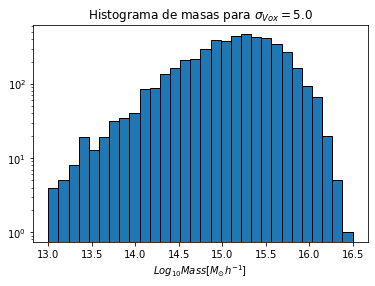

In [22]:
masas_hist = masas2[masas2!=0]*masa_particula
plt.hist(np.log10(masas_hist),log=True,bins=30,edgecolor = 'black',range = (13,16.5))
plt.title('Histograma de masas para $\sigma_{Vox} = 5.0$')
plt.xlabel('$Log_{10}Mass[M_{\odot}h^{-1}]$')

In [23]:
volumenes2 = np.array(volumenes)
densidad = masas_hist/volumenes2[masas2!=0]

Text(0.5, 0, '$Log_{10}Density[M_{\\odot}Mpc^3h^{-2}]$')

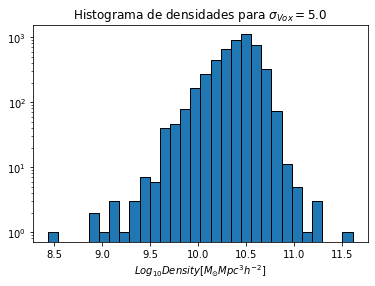

In [24]:
plt.hist(np.log10(densidad),log=True,bins=30,edgecolor = 'black')
plt.title('Histograma de densidades para $\sigma_{Vox} = 5.0$')
plt.xlabel('$Log_{10}Density[M_{\odot}Mpc^3h^{-2}]$')

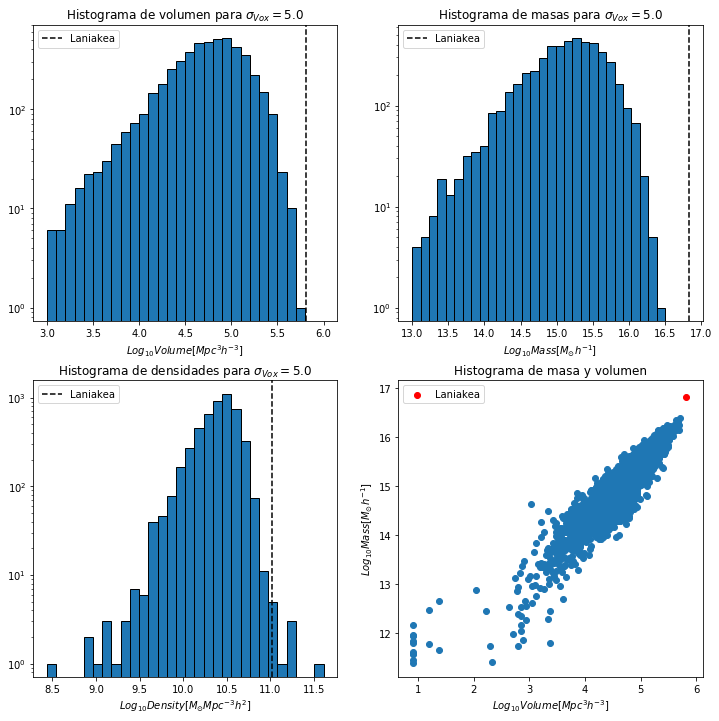

In [32]:
plt.figure(figsize = (12,12))

plt.subplot(2,2,1)

plt.hist(np.log10(volumenes),log=True,bins=30,edgecolor = 'black', range = (3,6))
plt.axvline(np.log10(645034.5514),linestyle = '--', color = 'black', label = 'Laniakea')
plt.title('Histograma de volumen para $\sigma_{Vox} = 5.0$')
plt.xlabel('$Log_{10}Volume[Mpc^3h^{-3}]$')
plt.legend()

plt.subplot(2,2,2)

masas_hist = masas2[masas2!=0]*masa_particula
plt.hist(np.log10(masas_hist),log=True,bins=30,edgecolor = 'black',range = (13,16.5))
plt.axvline(np.log10(0.67E17),linestyle = '--', color = 'black', label = 'Laniakea')
plt.title('Histograma de masas para $\sigma_{Vox} = 5.0$')
plt.xlabel('$Log_{10}Mass[M_{\odot}h^{-1}]$')
plt.legend()

plt.subplot(2,2,3)

plt.hist(np.log10(densidad),log=True,bins=30,edgecolor = 'black')
plt.axvline(np.log10(0.67E17/645034.5514),linestyle = '--', clip_on = True, color = 'black', label = 'Laniakea')
plt.title('Histograma de densidades para $\sigma_{Vox} = 5.0$')
plt.xlabel('$Log_{10}Density[M_{\odot}Mpc^{-3}h^{2}]$')
plt.legend()

plt.subplot(2,2,4)

plt.scatter(np.log10(volumenes2[masas2!=0]), np.log10(masas_hist))
plt.scatter(np.log10(645034.5514),np.log10(0.67E17),c = 'red', marker = 'o',label = 'Laniakea')
plt.title('Histograma de masa y volumen')
plt.xlabel('$Log_{10}Volume[Mpc^3h^{-3}]$')
plt.ylabel('$Log_{10}Mass[M_{\odot}h^{-1}]$')
plt.legend()
plt.savefig('histogramas.png')

In [26]:
np.std(np.log10(densidad))

0.2361316090606721

In [27]:
np.mean(np.log10(densidad))

10.388588481458642